In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

In [16]:
# import data
df = pd.read_csv('College_Data.csv')
df

,University,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [17]:
df = pd.get_dummies(df, columns=['Private'], drop_first=True)
df

,University,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_Yes
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,0
773,Xavier University,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,1
774,Xavier University of Louisiana,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,1
775,Yale University,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,1


In [18]:
df.drop('University', axis=1, inplace=True)
df

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_Yes
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,0
773,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,1
774,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,1
775,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,1


In [19]:
df = df.replace(r'^\s*$', np.nan, regex=True)
df

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_Yes
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,0
773,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,1
774,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,1
775,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,1


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)

In [21]:
df_scaled

array([[-3.46881819e-01, -3.21205453e-01, -6.35089011e-02, ...,
        -5.01910084e-01, -3.18251941e-01,  6.12553050e-01],
       [-2.10884040e-01, -3.87029908e-02, -2.88584214e-01, ...,
         1.66109850e-01, -5.51261842e-01,  6.12553050e-01],
       [-4.06865631e-01, -3.76317928e-01, -4.78121319e-01, ...,
        -1.77289956e-01, -6.67766793e-01,  6.12553050e-01],
       ...,
       [-2.33895071e-01, -4.23771558e-02, -9.15087008e-02, ...,
        -2.56241250e-01, -9.59029170e-01,  6.12553050e-01],
       [ 1.99171118e+00,  1.77256262e-01,  5.78332661e-01, ...,
         5.88797079e+00,  1.95359460e+00,  6.12553050e-01],
       [-3.26765760e-03, -6.68715889e-02, -9.58163623e-02, ...,
        -9.87115613e-01,  1.95359460e+00,  6.12553050e-01]])

In [22]:
# choose the best number of clusters using The Dendrogram
import scipy.cluster.hierarchy as sch

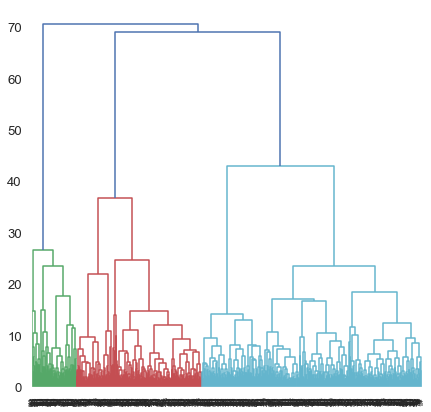

In [23]:
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))

In [24]:
model = AgglomerativeClustering(n_clusters=3)
clusters = model.fit_predict(df)

In [25]:
clusters

array([2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 0,
       2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1, 0, 1, 2, 1, 2,
       2, 2, 2, 0, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 1, 1, 2, 1, 0, 2, 2, 2, 1, 1, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 1, 1, 0, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1,
       0, 0, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1,
       2, 1, 0, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 1, 0, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 0, 2, 2, 2, 0, 0, 2, 2, 0, 1, 0, 0, 2, 2, 2, 1, 2,
       2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2,

In [26]:
df['Clusters'] = clusters
df

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_Yes,Clusters
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1,2
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1,2
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1,2
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1,1
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,0,2
773,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,1,2
774,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,1,2
775,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,1,1


In [27]:
df.groupby('Clusters').describe()['Enroll']

,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,155.0,2171.529032,1214.697121,262.0,1283.0,1843.0,2785.5,6392.0
1,143.0,618.356643,462.440257,91.0,310.5,478.0,712.5,2464.0
2,479.0,377.926931,254.967979,35.0,196.0,308.0,482.0,1685.0


In [28]:
df

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_Yes,Clusters
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1,2
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1,2
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1,2
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1,1
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,0,2
773,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,1,2
774,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,1,2
775,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,1,1


In [29]:
x = df.drop('Clusters', axis=1)
y = df['Clusters']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()
knn.fit(x_train, y_train) 

y_pred = knn.predict(x_test)

In [34]:
accuracy_score(y_test, y_pred)

0.9294871794871795

In [37]:
data = [2000, 1200, 700, 20, 50, 2500, 90, 7000, 6000, 300, 2200, 50, 70, 20, 20, 4000, 99, 0]

In [38]:
knn.predict(scaler.transform([data]))


array([2], dtype=int64)

In [39]:
import joblib

In [40]:
joblib.dump(knn, 'knn_model.h5')
joblib.dump(scaler, 'knn_scaler.h5')

['knn_scaler.h5']